<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Intro-to-ML-models/blob/main/Problems_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/18N3VBEtOYA_oqgZgtRJ0GcEPnsgkqZqo?usp=sharing


In [ ]:
!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 29.4MB/s]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
def predict(x,weight): # predict y_hat
  y_hat = weight[0]+weight[1]*x
  return y_hat

In [ ]:
def error(x,weight,y): # mean square error
  N = x.shape[0]
  total_error = 0.0
  for i in range(N):
    y_hat = predict(x[i],weight)
    total_error += (y[i]-y_hat)**2

  return total_error/N

In [ ]:
def gradient(x,weight,y):
  N = x.shape[0]
  grad = np.zeros((2,))
  for i in range(N):
    y_hat = predict(x[i],weight)
    grad[0] += -2*(y[i]-y_hat) # w0
    grad[1] += -2*x[i]*(y[i]-y_hat) # w1

  return grad/N

In [ ]:
def gradient_descent(x,y,epochs=20,learning_rate=1):
  weight = np.zeros((2,))
  error_list = []
  weight_list = []
  grad_list = []

  for i in range(epochs):
    # compute gradient
    grad = gradient(x,weight,y)
    grad_list.append((grad[0],grad[1]))
    # error
    e = error(x,weight,y)

    # update weights
    weight[0] -= learning_rate * grad[0]
    weight[1] -= learning_rate * grad[1]

    error_list.append(e)
    weight_list.append((weight[0],weight[1]))

  return weight, error_list, weight_list, grad_list

In [ ]:
y = df["selling_price"].values
x = df["year"].values

weight, error_list, weight_list, grad_list = gradient_descent(x,y,epochs=50, learning_rate=0.1)
print(weight)

[5.48585731e-16 3.90661784e-01]


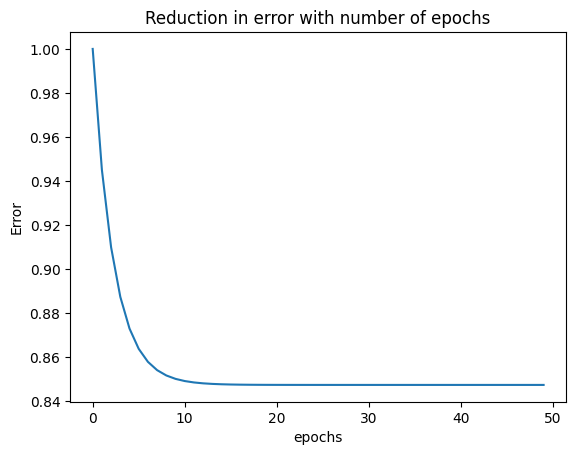

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.plot(error_list)
plt.title("Reduction in error with number of epochs")
plt.xlabel("epochs")
plt.ylabel("Error")
plt.show()

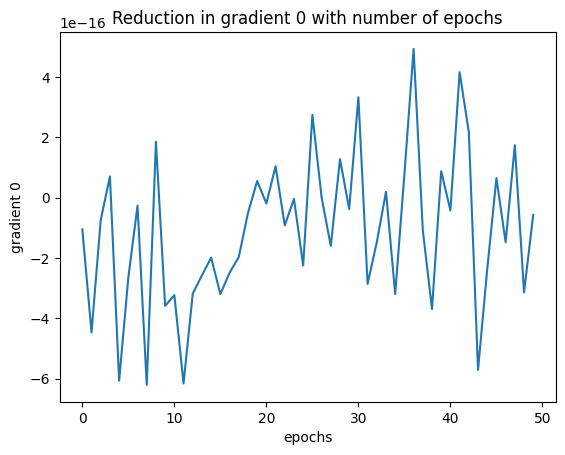

In [ ]:
grad = [g[0] for g in grad_list]
%matplotlib inline
fig = plt.figure()
plt.plot(grad)
plt.title("Reduction in gradient 0 with number of epochs")
plt.xlabel("epochs")
plt.ylabel("gradient 0")
plt.show()

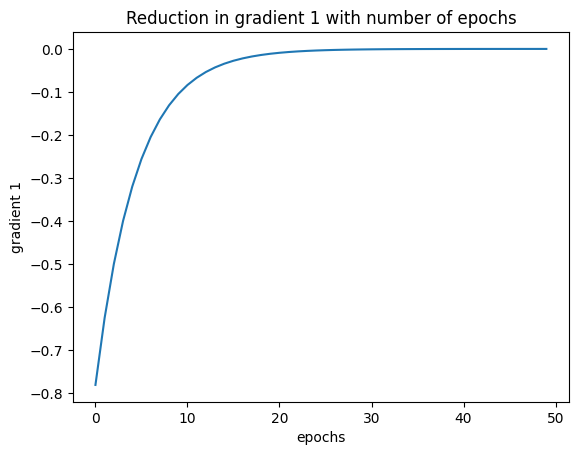

In [ ]:
grad = [g[1] for g in grad_list]
%matplotlib inline
fig = plt.figure()
plt.plot(grad)
plt.title("Reduction in gradient 1 with number of epochs")
plt.xlabel("epochs")
plt.ylabel("gradient 1")
plt.show()